### Analysis of AnthroScores across Different Topics

In [1]:
# analysis of anthroscores
from anthroscore_utils import get_anthroscore

In [2]:
import torch
from transformers import RobertaForMaskedLM, RobertaTokenizer, DistilBertForMaskedLM

In [3]:
import transformers

In [4]:
with open("LM_terms.txt") as f:
        LLM_entities = [line.rstrip('\n') for line in f]
    
model = DistilBertForMaskedLM.from_pretrained('roberta-base')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("BERT model loaded on %s"%device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['transformer.layer.4.attention.q_lin.bias', 'transformer.layer.9.attention.out_lin.weight', 'transformer.layer.6.ffn.lin2.weight', 'transformer.layer.9.attention.q_lin.weight', 'transformer.layer.11.output_layer_norm.bias', 'transformer.layer.8.sa_layer_norm.bias', 'vocab_transform.bias', 'transformer.layer.1.sa_layer_norm.bias', 'embeddings.position_embeddings.weight', 'transformer.layer.1.sa_layer_norm.weight', 'transformer.layer.3.ffn.lin2.weight', 'transformer.layer.5.output_layer_norm.weight', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.6.attention.v_lin.bias', 'transformer.layer.7.attention.v_lin.bias', 'transformer.layer.6.sa_layer_norm.weight', 'transformer.layer.9.ffn.lin2.w

BERT model loaded on cuda


In [5]:
import pandas as pd

In [6]:
# get anthroscore of document
topic9_articles = pd.read_csv("Topic_9_documents.csv")

In [7]:
topic9_articles.abstract

0       Eleven groups participated in the event. This ...
1       We have developed a web site called Minna no H...
2       Thanks to the profusion of freely available to...
3       Text mining for global health surveillance is ...
4       Part-of-Speech patterns extracted from paralle...
                              ...                        
4731    Automatic language identification is a challen...
4732    We present a new version of the Google Books N...
4733    This paper describes recent progress and the a...
4734    We present an LFG-DOP parser which uses fragme...
4735    The processes through which readers evoke ment...
Name: abstract, Length: 4736, dtype: object

In [8]:
topic9_articles['anthroscore'] = topic9_articles.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


Token indices sequence length is longer than the specified maximum sequence length for this model (770 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (770) must match the size of tensor b (514) at non-singleton dimension 1

<Axes: xlabel='year', ylabel='anthroscore'>

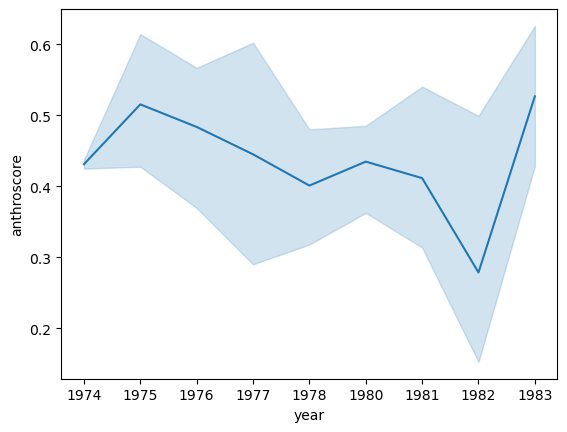

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="year",y="anthroscore",data=topic9_articles)